Ref: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-keras-and-tf.ipynb

In [6]:
import tensorflow as tf
import numpy as np
x = tf.ones(shape=(2, 1))
print(x)

x = tf.zeros(shape=(2, 1))
print(x)


tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.random.normal(shape=(3,1), mean=5.0, stddev=2.0)
print(x)

tf.Tensor(
[[2.7722356]
 [8.507418 ]
 [5.5501604]], shape=(3, 1), dtype=float32)


In [3]:
x = tf.random.uniform(shape=(3,2), minval=0, maxval=10)
print(x)

tf.Tensor(
[[4.118556  2.7656841]
 [5.065895  6.043198 ]
 [8.849138  7.350838 ]], shape=(3, 2), dtype=float32)


In [5]:
# x[0,0] = 1
# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# Untitled-1.ipynb Cell 4' in <module>
# ----> 1 x[0,0] = 1

# TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [7]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

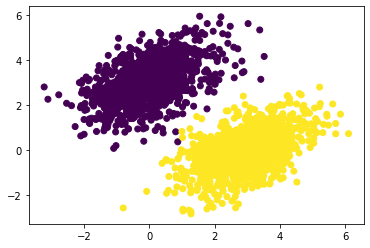

In [8]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [9]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))


In [11]:
def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [12]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [16]:
for step in range(400):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0275
Loss at step 1: 0.0272
Loss at step 2: 0.0269
Loss at step 3: 0.0267
Loss at step 4: 0.0264
Loss at step 5: 0.0262
Loss at step 6: 0.0260
Loss at step 7: 0.0258
Loss at step 8: 0.0257
Loss at step 9: 0.0255
Loss at step 10: 0.0254
Loss at step 11: 0.0252
Loss at step 12: 0.0251
Loss at step 13: 0.0250
Loss at step 14: 0.0249
Loss at step 15: 0.0248
Loss at step 16: 0.0247
Loss at step 17: 0.0247
Loss at step 18: 0.0246
Loss at step 19: 0.0245
Loss at step 20: 0.0245
Loss at step 21: 0.0244
Loss at step 22: 0.0244
Loss at step 23: 0.0243
Loss at step 24: 0.0243
Loss at step 25: 0.0242
Loss at step 26: 0.0242
Loss at step 27: 0.0242
Loss at step 28: 0.0241
Loss at step 29: 0.0241
Loss at step 30: 0.0241
Loss at step 31: 0.0241
Loss at step 32: 0.0240
Loss at step 33: 0.0240
Loss at step 34: 0.0240
Loss at step 35: 0.0240
Loss at step 36: 0.0240
Loss at step 37: 0.0240
Loss at step 38: 0.0239
Loss at step 39: 0.0239
Loss at step 40: 0.0239
Loss at step 41: 0.0239
Lo

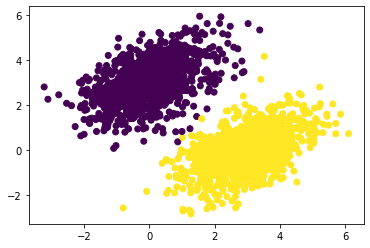

In [14]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

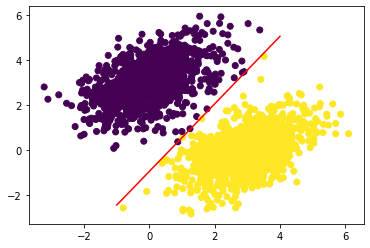

In [15]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)